In [96]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [97]:
df_edges=pd.read_csv("Desktop/karmasikag/InputFileEdges.csv")

In [98]:
df_nodes=pd.read_csv("Desktop/karmasikag/InputFileNodes.csv")

In [99]:
df_nodes.head()

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


In [100]:
df_edges.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [101]:
G = nx.Graph()

# Düğümleri ekle
G.add_nodes_from(df_nodes["id"])

# Kenarları ekle
for idx, row in df_edges.iterrows():
    G.add_edge(row["from"], row["to"], weight=row.get("weight", 1), type=row.get("type", ""))

print("Düğümler:", G.nodes())
print("Kenarlar:", G.edges(data=True))


Düğümler: ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17']
Kenarlar: [('s01', 's02', {'weight': 23, 'type': 'hyperlink'}), ('s01', 's03', {'weight': 21, 'type': 'hyperlink'}), ('s01', 's04', {'weight': 21, 'type': 'hyperlink'}), ('s01', 's15', {'weight': 11, 'type': 'hyperlink'}), ('s01', 's05', {'weight': 1, 'type': 'mention'}), ('s02', 's05', {'weight': 21, 'type': 'hyperlink'}), ('s02', 's03', {'weight': 21, 'type': 'hyperlink'}), ('s02', 's10', {'weight': 5, 'type': 'hyperlink'}), ('s02', 's09', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's04', {'weight': 23, 'type': 'hyperlink'}), ('s03', 's12', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's10', {'weight': 2, 'type': 'mention'}), ('s03', 's11', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's08', {'weight': 4, 'type': 'hyperlink'}), ('s03', 's05', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's07', {'weight': 1, 'type': 'mention'}), ('s04', 's11', {'weight': 

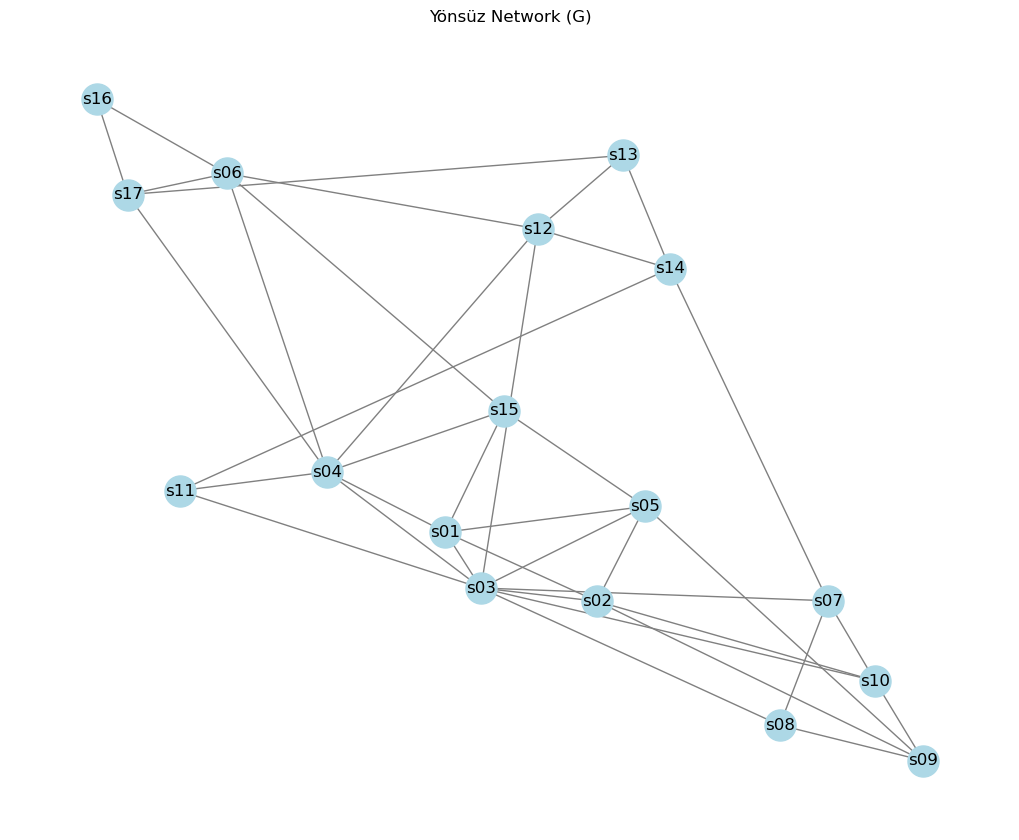

In [102]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500)
plt.title("Yönsüz Network (G)")
plt.show()


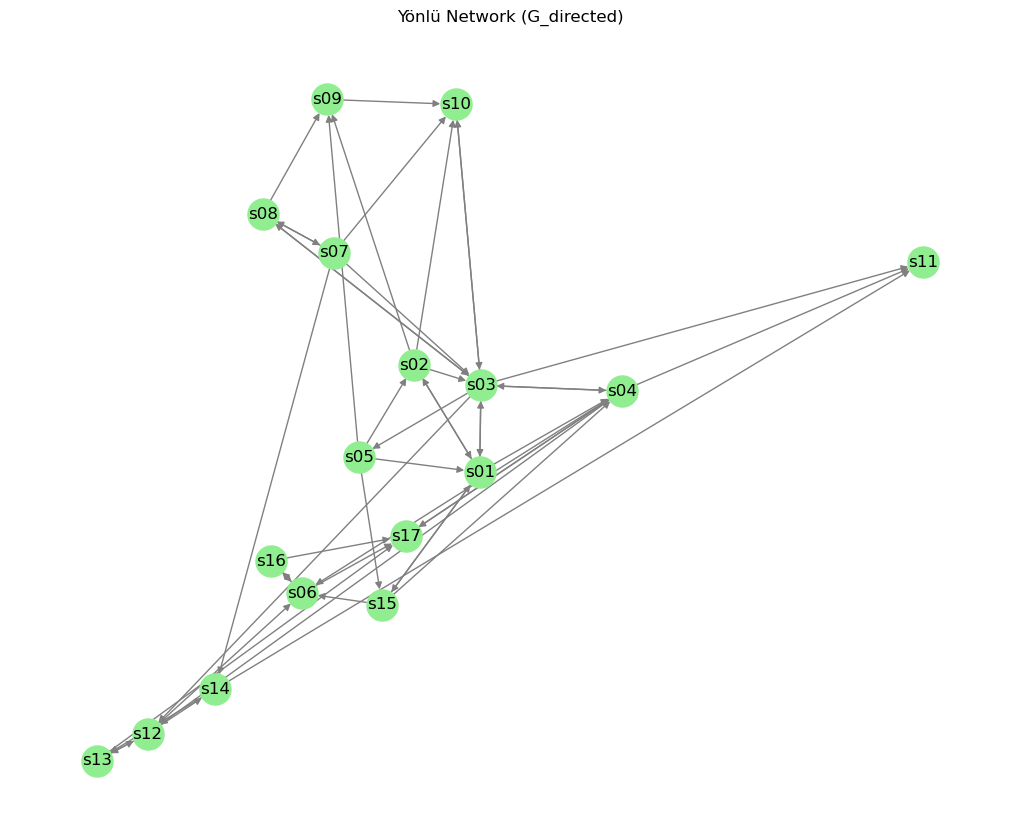

In [103]:
G_directed = nx.DiGraph()

for idx, row in df_edges.iterrows():
    G_directed.add_edge(row["from"], row["to"], weight=row.get("weight", 1), type=row.get("type", ""))

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G_directed, seed=42)
nx.draw(G_directed, pos, with_labels=True, node_color="lightgreen", edge_color="gray", arrows=True, node_size=500)
plt.title("Yönlü Network (G_directed)")
plt.show()


In [104]:
degrees = dict(G.degree())
degrees
# derece nedır ? bır dugumun baglı oldugu kenar sayısı demektır. 

{'s01': 5,
 's02': 5,
 's03': 9,
 's04': 7,
 's05': 5,
 's06': 5,
 's07': 4,
 's08': 3,
 's09': 4,
 's10': 4,
 's11': 3,
 's12': 5,
 's13': 3,
 's14': 4,
 's15': 4,
 's16': 2,
 's17': 4}

In [105]:
avg_degree = sum(degrees.values()) / len(degrees)
print("Ortalama derece:", avg_degree)
#agdakı tum dugumlerın ortalama derecesı:yanı su sekılde yapıyoruz her dugumun derecelerını topluyoruz sonrasında toplam dugum sayısına boluyoruz.


Ortalama derece: 4.470588235294118


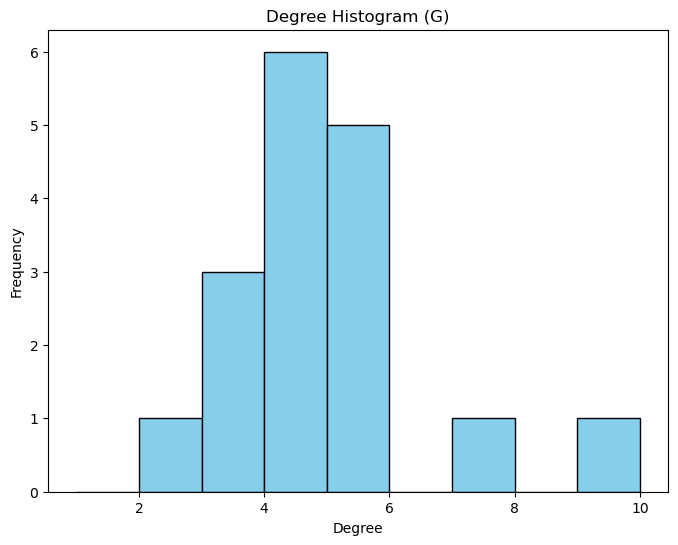

In [106]:
plt.figure(figsize=(8,6))
plt.hist(list(degrees.values()), bins=range(1, max(degrees.values())+2), color="skyblue", edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Histogram (G)")
plt.show()

#hıstogram grafıgı şudur tekrar edılen derecelerın gosterımı . yanı 4 derecesınden 2 tane varsa eger hıstogramda x satırı derece ısımlerı y ler tekrar mıktarı oluyor 


In [107]:
deg_centrality = nx.degree_centrality(G)
deg_centrality
# dugumun toplam baglantı sayısının normalıze edılmıs halı  yanı.   s01 dugumunun derecesı / toplam dugum sayısı(17)-1
#bunun anlamı şu ağda en merkezde olan dugumler diğer dugumlere en çok baglanan dugumlerdır. burda s03 en fazla yanı merkezde bu varmıs dıyebılırız.

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's05': 0.3125,
 's06': 0.3125,
 's07': 0.25,
 's08': 0.1875,
 's09': 0.25,
 's10': 0.25,
 's11': 0.1875,
 's12': 0.3125,
 's13': 0.1875,
 's14': 0.25,
 's15': 0.25,
 's16': 0.125,
 's17': 0.25}

In [108]:
close_centrality = nx.closeness_centrality(G)
close_centrality
# closeness centrality de i ve j dugumu arasındakı en kısa yol mesafesı oluyor . bunun verdıgı sonuc ağda dığer dugumlere en hızlı 
#ulasabılen dugumlere yuksek closeness centralıty e sahıp 
#closeness centralıty soyle mı hesaplanıyor o zmaan benım a dugumum var bundan butun dıger dugumlere yolları topluyorum sonrasında bunu 0 1 arasına ındırgemek ıcın 
#toplam dugum sayısı -1 / a dugumunun toplam mesafesı bunu a ıcın yaptım hepsı ıcın yapıyorum ve sıralıyorum


{'s01': 0.5333333333333333,
 's02': 0.48484848484848486,
 's03': 0.6666666666666666,
 's04': 0.6153846153846154,
 's05': 0.5161290322580645,
 's06': 0.5,
 's07': 0.48484848484848486,
 's08': 0.45714285714285713,
 's09': 0.41025641025641024,
 's10': 0.47058823529411764,
 's11': 0.5161290322580645,
 's12': 0.5714285714285714,
 's13': 0.43243243243243246,
 's14': 0.47058823529411764,
 's15': 0.48484848484848486,
 's16': 0.35555555555555557,
 's17': 0.45714285714285713}

In [109]:
between_centrality = nx.betweenness_centrality(G)
between_centrality
# bır dugumun dıger dugumler arasındakı en kısa yollar uzerınde kac kez gectıgını ölçer 
#şöyle ornek verelım a dan c ye 3 yol var bunlardan 2 tanesı en kısa yol sonrasında bu en kısa yollardan bırınde
#b dugumu var o zaman şöyle yapıyoryuz toplam en kısa yol 1/2  = 0.5 cıkıyor 

{'s01': 0.039146825396825395,
 's02': 0.025992063492063486,
 's03': 0.3404166666666667,
 's04': 0.19566468253968256,
 's05': 0.0654563492063492,
 's06': 0.10018849206349206,
 's07': 0.050277777777777775,
 's08': 0.019593253968253968,
 's09': 0.017361111111111112,
 's10': 0.025843253968253963,
 's11': 0.017916666666666664,
 's12': 0.12271825396825398,
 's13': 0.02111111111111111,
 's14': 0.049166666666666664,
 's15': 0.05621031746031746,
 's16': 0.0,
 's17': 0.05293650793650794}

In [110]:
eigen_centrality = nx.eigenvector_centrality(G)
eigen_centrality
# dugumun onemını sadece kendısıne gore degıl baglı oldugu dugumlerın onemıne gore ölçüyor
# yanı onemlı dugumlere baglı olan dugumler daha değierli oluyor 
#sosyal aglarda onemlı kısılerle arkadas olan kısı daha etkılı mantıgına benzer 

#Eğer bir düğüm, yüksek centrality’ye sahip düğümlere bağlıysa → daha yüksek eigenvector centrality alır.

#Eğer bir düğüm, düşük öneme sahip düğümlere bağlıysa → centrality düşük olur.

#A ağında düğümler: A, B, C, D

#A düğümü sadece D’ye bağlı, D çok bağlantılı ve önemli bir düğüm → A’nın eigenvector centrality değeri yüksek

#Aynı A düğümü sadece önemsiz, az bağlantılı bir düğüme bağlı olsaydı → değeri düşük olurdu


{'s01': 0.31914086837291605,
 's02': 0.2910340882293078,
 's03': 0.4485472979675353,
 's04': 0.3528334611736863,
 's05': 0.2925525270528745,
 's06': 0.20688820586442142,
 's07': 0.1936188619934287,
 's08': 0.1646295034122241,
 's09': 0.1915922923064456,
 's10': 0.22209545169996198,
 's11': 0.1869275012952371,
 's12': 0.248809538829334,
 's13': 0.1065065446362404,
 's14': 0.14530038460965825,
 's15': 0.23130251528184956,
 's16': 0.06953859174549203,
 's17': 0.14528213666865794}

In [111]:
katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
katz_centrality
#Katz centrality, bir düğümün önemini 
#hesaplarken sadece komşularına değil, ağın tüm düğümlerinden gelen dolaylı bağlantıları da dikkate alır.
#Eigenvector centrality: “önemli komşulara bağlı olmak önemli”

#Katz centrality: “önemli komşular + dolaylı bağlantılar da önemli”

{'s01': 0.26618995468000056,
 's02': 0.2585215019695379,
 's03': 0.34789014571380716,
 's04': 0.3038043118306105,
 's05': 0.2586965789254257,
 's06': 0.2442980782147961,
 's07': 0.22594163228954287,
 's08': 0.2054925425620493,
 's09': 0.22137717853028713,
 's10': 0.23134469275900307,
 's11': 0.21263833994049874,
 's12': 0.25655543309454787,
 's13': 0.19487285332569476,
 's14': 0.21497247277371392,
 's15': 0.23327053927376878,
 's16': 0.17214987056034825,
 's17': 0.21748415830183052}

In [112]:
pagerank = nx.pagerank(G)
pagerank
#Bir düğüme çok sayıda 
#bağlantı geliyorsa, ama bu bağlantılar önemsiz düğümlerden geliyorsa değeri düşük olur.
#Bir düğüme az sayıda ama önemli düğümlerden bağlantı geliyorsa değeri yüksek olur.
#Yani “önemli düğümlerden link almak daha değerli” mantığıyla çalışır.

{'s01': 0.07895689156411094,
 's02': 0.07408948894594015,
 's03': 0.07747354302344264,
 's04': 0.0807669940699498,
 's05': 0.052606002375308505,
 's06': 0.06032323305939223,
 's07': 0.06014907369131579,
 's08': 0.049062936999981495,
 's09': 0.04691566498939044,
 's10': 0.06064654355105956,
 's11': 0.030892273938341853,
 's12': 0.06006996912646309,
 's13': 0.05386907971324525,
 's14': 0.059465793251680776,
 's15': 0.04392516802794295,
 's16': 0.05281565866599218,
 's17': 0.057971685006442314}

In [113]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
# Modularity hesapla
modularity = nx.algorithms.community.quality.modularity(G, communities)
print("Modularity:", modularity)
#Özetle: Modularity, ağın topluluk yapısının güçlü mü yoksa zayıf mı olduğunu ölçer
#A, B, C aynı topluluk
#D, E, F başka topluluk
#A-B, B-C, A-C var → aynı toplulukta yoğun bağlantı → modularity artar
#Eğer A ve F bağlantısı olursa → farklı toplulukta bağlantı → modularity azalır

Modularity: 0.3543594271893116


In [114]:
density = nx.density(G)
print("Density:", density)
#Density, bir ağdaki mevcut bağlantı sayısının maksimum olabilecek bağlantı sayısına oranıdır.

Density: 0.27941176470588236


In [115]:
avg_clustering = nx.average_clustering(G)
print("Average clustering coefficient:", avg_clustering)
#Clustering coefficient (kümeleşme katsayısı)
#bir düğümün komşuları arasında ne kadar yoğun bağlantı olduğunu ölçer.

Average clustering coefficient: 0.4205882352941176


In [116]:
if nx.is_connected(G):
    diam = nx.diameter(G)
else:
    diam = nx.diameter(G.subgraph(max(nx.connected_components(G), key=len)))
print("Diameter:", diam)
#Diameter, bir ağdaki tüm düğümler arasındaki en kısa yolların en uzun olanıdır.


Diameter: 4


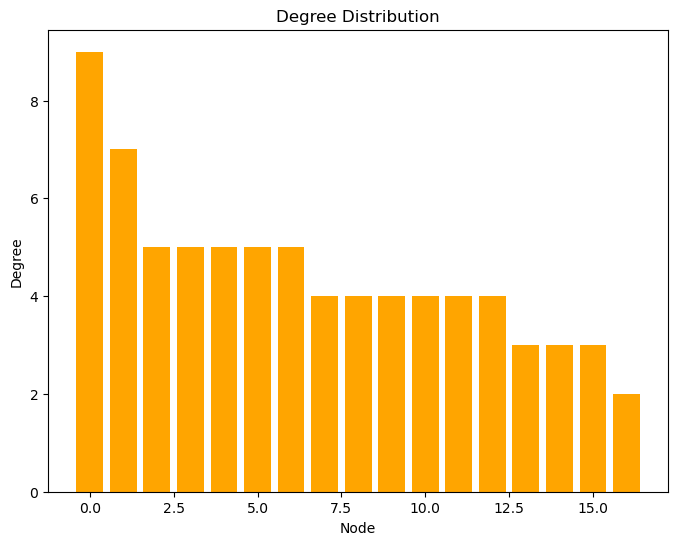

In [117]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

plt.figure(figsize=(8,6))
plt.bar(range(len(degree_sequence)), degree_sequence, color="orange")
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Degree Distribution")
plt.show()
#yanı a dugumun derecesı bu b dugumun derecesı bu gosterımı oluyor

In [118]:
print("Ortalama derece: Ağın düğümleri ortalama kaç bağlantıya sahip onu söyler")
print("Modularity: Toplulukların ne kadar belirgin olduğunu gösterir.")
print("Density: Ağın ne kadar yoğun olduğunu gösterir (0-1 arası).")
print("Average clustering: Ağdaki düğümlerin kümelenme eğilimi.")
print("Diameter: Ağdaki en uzun kısa yol.")


Ortalama derece: Ağın düğümleri ortalama kaç bağlantıya sahip onu söyler
Modularity: Toplulukların ne kadar belirgin olduğunu gösterir.
Density: Ağın ne kadar yoğun olduğunu gösterir (0-1 arası).
Average clustering: Ağdaki düğümlerin kümelenme eğilimi.
Diameter: Ağdaki en uzun kısa yol.


In [119]:
# --- 21. Adım (Alternatif): Köprü etkisi yüksek 5 düğüm (Betweenness Centrality) ---

import networkx as nx

print("21) Betweenness Centrality'ye göre En Kritik 5 'Köprü' Düğümü:\n")

bet = nx.betweenness_centrality(G)

top5 = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:5]

for node, score in top5:
    print(f"{node} --> Betweenness: {score}")


21) Betweenness Centrality'ye göre En Kritik 5 'Köprü' Düğümü:

s03 --> Betweenness: 0.3404166666666667
s04 --> Betweenness: 0.19566468253968256
s12 --> Betweenness: 0.12271825396825398
s06 --> Betweenness: 0.10018849206349206
s05 --> Betweenness: 0.0654563492063492


In [120]:
# --- 22. Adım: G network için En Kritik 5 'Lider' Düğümü ---

print("22) En Kritik 5 'Lider' Düğümünün Hesaplanması\n")

# 1) Degree Centrality
deg_cent = nx.degree_centrality(G)

# 2) Eigenvector Centrality
try:
    eig_cent = nx.eigenvector_centrality_numpy(G)
except:
    eig_cent = nx.eigenvector_centrality(G, max_iter=2000)

# 3) PageRank
pr_cent = nx.pagerank(G)

# --- Normalize fonksiyonu ---
def normalize_dict(d):
    vals = np.array(list(d.values()), dtype=float)
    if vals.max() == vals.min():  # tüm değerler eşitse
        return {k: 0 for k in d}
    norm = (vals - vals.min()) / (vals.max() - vals.min())
    return {k: v for k, v in zip(d.keys(), norm)}

# Normalize et
ndeg = normalize_dict(deg_cent)
neig = normalize_dict(eig_cent)
npr  = normalize_dict(pr_cent)

# Birleşik liderlik skoru
leader_score = {}
for node in G.nodes():
    leader_score[node] = ndeg[node] + neig[node] + npr[node]

# İlk 5 lideri sırala
top5_leaders = sorted(leader_score.items(), key=lambda x: x[1], reverse=True)[:5]

print("En Kritik 5 Lider Düğüm:\n")
for node, score in top5_leaders:
    print(f"{node} --> Liderlik Skoru: {score}")


22) En Kritik 5 'Lider' Düğümünün Hesaplanması

En Kritik 5 Lider Düğüm:

s03 --> Liderlik Skoru: 2.933965523258747
s04 --> Liderlik Skoru: 2.46174008137629
s01 --> Liderlik Skoru: 2.0508456417526064
s02 --> Liderlik Skoru: 1.8791003424135178
s12 --> Liderlik Skoru: 1.4865853745651503


23) G_directed için İn-Degree ve Out-Degree Dağılımı



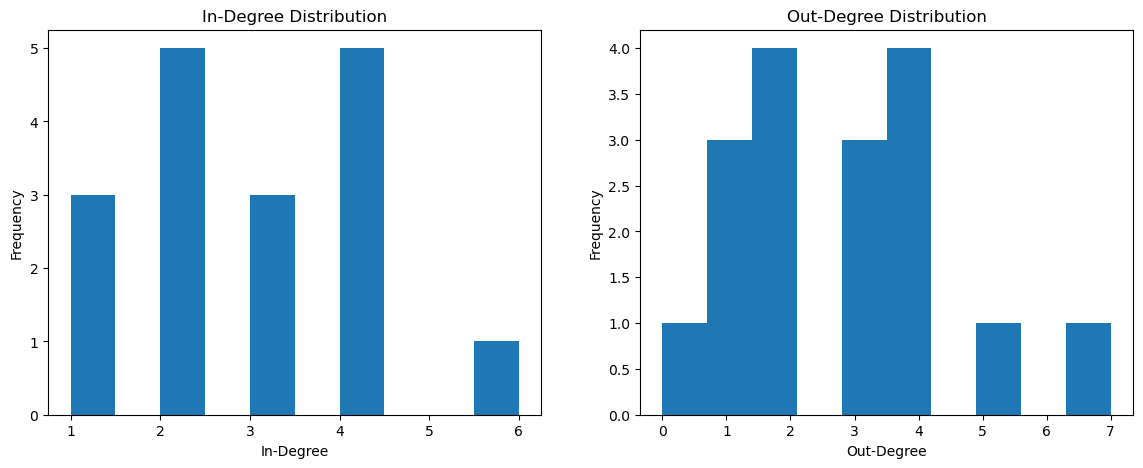

İn-degree değerleri: [4, 2, 6, 4, 3, 1, 2, 4, 4, 2, 3, 1, 4, 1, 3, 2, 2]
Out-degree değerleri: [4, 4, 7, 5, 0, 4, 3, 2, 1, 3, 1, 2, 1, 4, 3, 2, 2]


In [121]:
# --- 23. Adım: G_directed network için derece dağılımı ve histogramlar ---
print("23) G_directed için İn-Degree ve Out-Degree Dağılımı\n")

# Dereceler
in_degrees = [d for n, d in G_directed.in_degree()]
out_degrees = [d for n, d in G_directed.out_degree()]

# Histogramları çiz
plt.figure(figsize=(14,5))

# In-degree
plt.subplot(1,2,1)
plt.hist(in_degrees, bins=10)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")

# Out-degree
plt.subplot(1,2,2)
plt.hist(out_degrees, bins=10)
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")

plt.show()

print("İn-degree değerleri:", in_degrees)
print("Out-degree değerleri:", out_degrees)


24) En güçlü 3 düğümün kaldırılması ve yeni ağın çizilmesi

Ağdan kaldırılacak en güçlü 3 düğüm:
s03 --> Liderlik Skoru: 2.933965523258747
s04 --> Liderlik Skoru: 2.461740081376288
s01 --> Liderlik Skoru: 2.0508456417526046


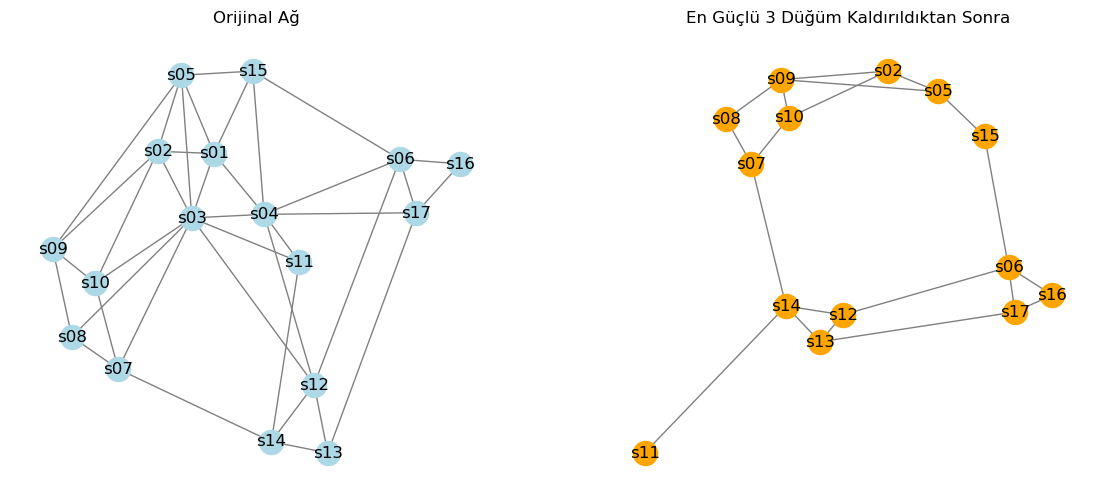


--- Değişim Analizi ---
Orijinal düğüm sayısı: 17
Yeni ağ düğüm sayısı: 14
Orijinal bileşen sayısı: 1
Yeni ağ bileşen sayısı: 1

Yorum:
- En güçlü düğümler kaldırılınca ağın yapısında kopmalar, bileşen artışı veya yoğunluk azalması görülebilir.
- Önemli lider düğümlerin yokluğu, ağın merkezileşmesini ve bilgi akışını zayıflatır.
- Eğer bileşen sayısı arttıysa, bu düğümlerin ağda kritik bağlantı rolü üstlendiği açıktır.


In [122]:
# --- 24. Adım: G'deki en güçlü 3 düğümü kaldır ve yeni ağı çiz --
print("24) En güçlü 3 düğümün kaldırılması ve yeni ağın çizilmesi\n")

# --- 1) Liderlik skorunu tekrar hesapla (Degree + Eigenvector + PageRank) ---
deg_cent = nx.degree_centrality(G)

try:
    eig_cent = nx.eigenvector_centrality_numpy(G)
except:
    eig_cent = nx.eigenvector_centrality(G, max_iter=2000)

pr_cent = nx.pagerank(G)

def normalize_dict(d):
    vals = np.array(list(d.values()), dtype=float)
    if vals.max() == vals.min():
        return {k: 0 for k in d}
    norm = (vals - vals.min()) / (vals.max() - vals.min())
    return {k: v for k, v in zip(d.keys(), norm)}

# Normalize
ndeg = normalize_dict(deg_cent)
neig = normalize_dict(eig_cent)
npr  = normalize_dict(pr_cent)

# Liderlik skoru
leader_score = {node: ndeg[node] + neig[node] + npr[node] for node in G.nodes()}

# En güçlü 3 düğüm
top3 = sorted(leader_score.items(), key=lambda x: x[1], reverse=True)[:3]
top3_nodes = [n for n, s in top3]

print("Ağdan kaldırılacak en güçlü 3 düğüm:")
for n, s in top3:
    print(f"{n} --> Liderlik Skoru: {s}")

# --- 2) Yeni ağı oluştur (kopya üzerinden) ---
G_removed = G.copy()
G_removed.remove_nodes_from(top3_nodes)

# --- 3) Orijinal ağ ve yeni ağ yan yana çizilsin ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Orijinal Ağ")

plt.subplot(1,2,2)
nx.draw(G_removed, with_labels=True, node_color="orange", edge_color="gray")
plt.title("En Güçlü 3 Düğüm Kaldırıldıktan Sonra")

plt.show()

# --- 4) Değişimi yazdır ---
print("\n--- Değişim Analizi ---")
print(f"Orijinal düğüm sayısı: {G.number_of_nodes()}")
print(f"Yeni ağ düğüm sayısı: {G_removed.number_of_nodes()}")

print(f"Orijinal bileşen sayısı: {nx.number_connected_components(G)}")
print(f"Yeni ağ bileşen sayısı: {nx.number_connected_components(G_removed)}")

print("\nYorum:")
print("- En güçlü düğümler kaldırılınca ağın yapısında kopmalar, bileşen artışı veya yoğunluk azalması görülebilir.")
print("- Önemli lider düğümlerin yokluğu, ağın merkezileşmesini ve bilgi akışını zayıflatır.")
print("- Eğer bileşen sayısı arttıysa, bu düğümlerin ağda kritik bağlantı rolü üstlendiği açıktır.")
